In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read in the Bellerochea data and metadata
data = pd.read_csv('../data/bellerochea_quantification_2.csv')
metadata = pd.read_csv('../data/samples_env.csv')

In [5]:
data.head()

,Sample,Name,Length,EffectiveLength,TPM,NumReads
0,10_21_330,ENA|GJWO01000001|GJWO01000001.1,1127,956.813,0.0,0.0
1,10_21_330,ENA|GJWO01000002|GJWO01000002.1,1126,955.813,0.0,0.0
2,10_21_330,ENA|GJWO01000003|GJWO01000003.1,830,659.813,0.0,0.0
3,10_21_330,ENA|GJWO01000004|GJWO01000004.1,1124,953.813,0.0,0.0
4,10_21_330,ENA|GJWO01000005|GJWO01000005.1,1125,954.813,0.0,0.0


In [22]:
# Group per sample and sum the NumReads counts
data_grouped = data[['Sample', 'TPM', 'NumReads']].groupby('Sample').sum()

# Merge the metadata with the data
data_grouped = data_grouped.merge(metadata, left_on='Sample', right_on='sample_name')

# Calculate a datetime column from the date and time columns
data_grouped['datetime'] = pd.to_datetime(data_grouped['date'] + ' ' + data_grouped['time'])
# Ignore the seconds
data_grouped['datetime'] = data_grouped['datetime'].dt.floor('min')

# Order samples by datetime
data_grouped = data_grouped.sort_values('datetime')

In [23]:
data_grouped.head()

,TPM,NumReads,sample_name,date,time,station,SW filtered (L),Eluate volume (mL),RNA extraction volume (mL),Date,...,CTD > Temperature,Nutrients > Ammonium_NH4,Nutrients > Nitrate_Nitrite,Nutrients > Nitrate_NO3,Nutrients > Nitrite_NO2,Nutrients > Phosphate_PO4,Nutrients > Silicate_SiO4,SPM > SPM,day_length,datetime
62,1.000000e+06,26470.999,7_20_330,2020-07-22,11:10:00,330,50,18.0,6.0,2020-07-22,...,18.364735,NaN,NaN,NaN,NaN,NaN,NaN,20.5,15.850000,2020-07-22 11:10:00
63,1.000000e+06,3886.002,7_20_700,2020-07-22,13:55:00,700,50,18.0,6.0,2020-07-22,...,19.529622,NaN,NaN,NaN,NaN,NaN,NaN,43.0,15.833333,2020-07-22 13:55:00
64,1.000000e+06,47154.999,7_20_ZG02,2020-07-23,13:50:00,ZG02,50,18.0,2.0,2020-07-23,...,18.529214,NaN,NaN,NaN,NaN,NaN,NaN,22.0,15.800000,2020-07-23 13:50:00
71,1.000000e+06,49622.000,8_20_330,2020-08-17,11:35:00,330,50,36.0,9.0,2020-08-17,...,20.756806,NaN,NaN,NaN,NaN,NaN,NaN,31.0,14.450000,2020-08-17 11:35:00
72,1.000000e+06,104896.996,8_20_700,2020-08-17,14:05:00,700,50,36.0,9.0,2020-08-17,...,22.388308,NaN,NaN,NaN,NaN,NaN,NaN,47.0,14.450000,2020-08-17 14:05:00


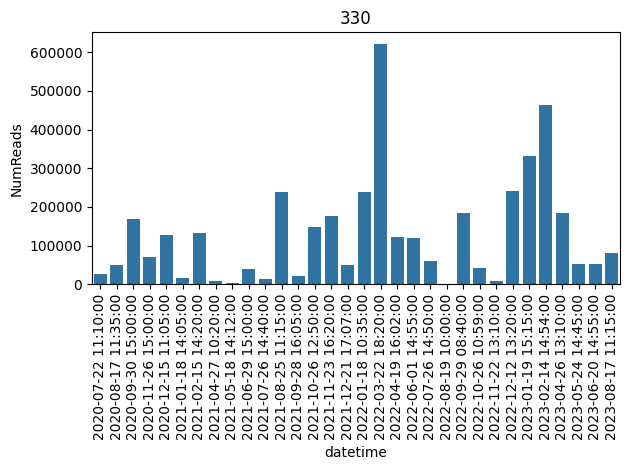

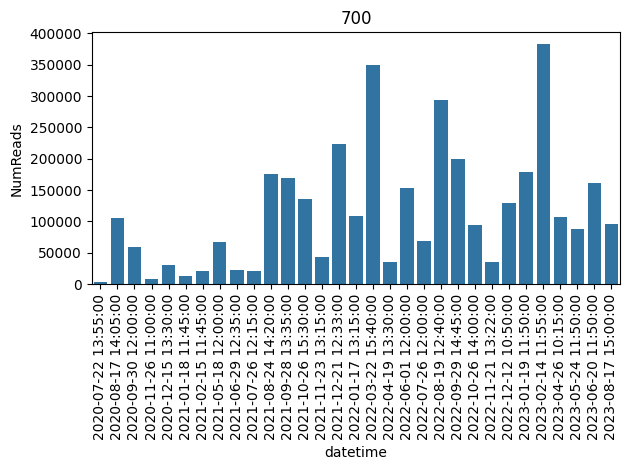

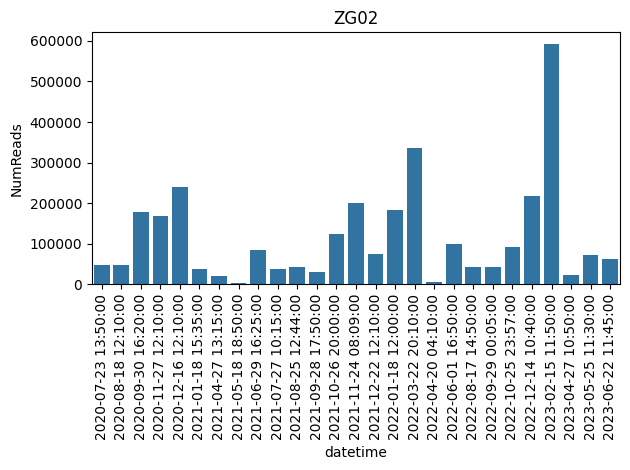

In [24]:
# Loop over the stations and plot the NumRead sums over time
for station in data_grouped['station'].unique():
    data_station = data_grouped[data_grouped['station'] == station]
    fig = plt.figure()
    fig = sns.barplot(x='datetime', y='NumReads', data=data_station)
    plt.xticks(rotation=90)
    plt.title(station)
    plt.tight_layout()
    plt.savefig(f'../figures/NumReads_{station}.png')